# Задача 3. Сравнение методов классификации

## Задача

- Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- * (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- * (**+3 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

## Методы классификации

Реализация KNN, SVM

In [1]:
import numpy as np


class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def predict(self, X):
        result = np.empty((X.shape[0],), dtype=self.y.dtype)

        for i, x in enumerate(X):
            dists = np.linalg.norm(self.X - x, axis=1)
            sorted_dists_idx = np.argsort(dists)
            k_neighbor_classes = self.y[sorted_dists_idx][:self.k]
            elements, counts = np.unique(k_neighbor_classes, return_counts=True)
            result[i] = elements[np.argmax(counts)]

        return result


class SVMClassifier:
    def __init__(self, learning_rate=0.001, iter_num=10000, lmda=0.01):
        self.learning_rate = learning_rate
        self.iter_num = iter_num
        self.lmda = lmda

    def fit(self, X, y):
        self._classes = np.unique(y)
        for _ in range(self.iter_num):
            self.w = np.zeros(X.shape[1])
            self.b = 0
            y_label = np.where(y <= 0, -1, 1)
            for i, x in enumerate(X):
                if y_label[i] * (np.dot(x, self.w) - self.b) >= 1:
                    dw = 2 * self.lmda * self.w
                    db = 0
                else:
                    dw = 2 * self.lmda * self.w - np.dot(x, y_label[i])
                    db = y_label[i]
                self.w = self.w - self.learning_rate * dw
                self.b = self.b - self.learning_rate * db
        return self

    def predict(self, X):
        prediction = np.sign(np.dot(X, self.w) - self.b)
        y = np.where(prediction <= -1, 0, 1)
        return y


## EDA

Датасет: [heart_disease](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease/)

Признаки:
- `age`: возраст в годах
- `sex`: пол (1 - мужской; 0 - женский)
- `cp`: тип грудной боли
- `trestbps`: артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в стационар)
- `chol`: холестерин сыворотки в мг/дл
- `fbs`: уровень сахара в крови натощак > 120 мг/дл (1 = верно; 0 = неверно)
- `restecg`: результаты электрокардиографии в покое
- `thalach`: максимальная частота сердечных сокращений
- `exang`: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
- `oldpeak`: депрессия сегмента ST, вызванная физическими упражнениями, по сравнению с отдыхом
- `slope`: наклон пикового сегмента ST при нагрузке
- `ca`: количество магистральных сосудов (0-3), окрашенных флюороскопией
- `thal`:  3 - нормальный; 6 - исправленный дефект; 7 - обратимый дефект
- `target`: наличие заболевания (1=да; 0=нет)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.3f}".format

df = pd.read_csv("../../data/heart_disease/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Пропущенных значений нет, все признаки закодированы числами.

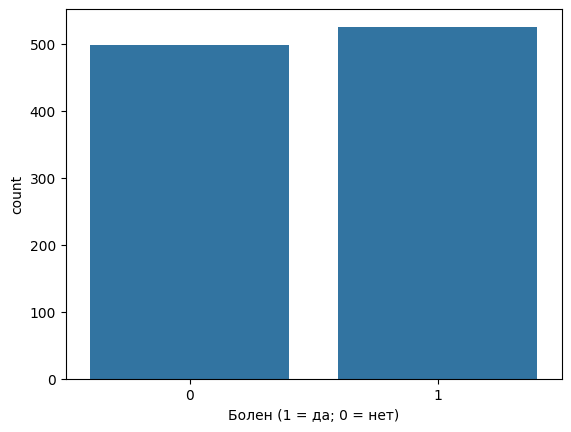

In [4]:
sns.countplot(x="target", data=df)
plt.xlabel('Болен (1 = да; 0 = нет)')
plt.show()

Параметр, который необходимо предсказать состоит из двух, практически равных, долей.

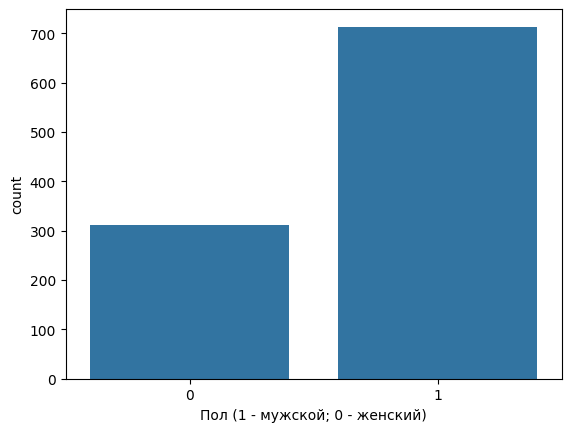

In [5]:
sns.countplot(x="sex", data=df)
plt.xlabel('Пол (1 - мужской; 0 - женский)')
plt.show()


В датасете больше информации о мужчинах, чем о женщинах.

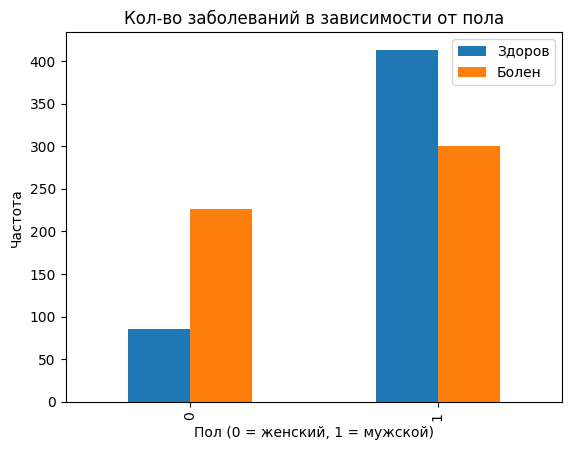

In [6]:
pd.crosstab(df["sex"], df["target"]).plot(kind="bar")
plt.title('Кол-во заболеваний в зависимости от пола')
plt.xlabel('Пол (0 = женский, 1 = мужской)')
plt.ylabel('Частота')
plt.legend(["Здоров", "Болен"])
plt.show()


Больше половины мужчин в датасете больны, большая часть женщин - больна.

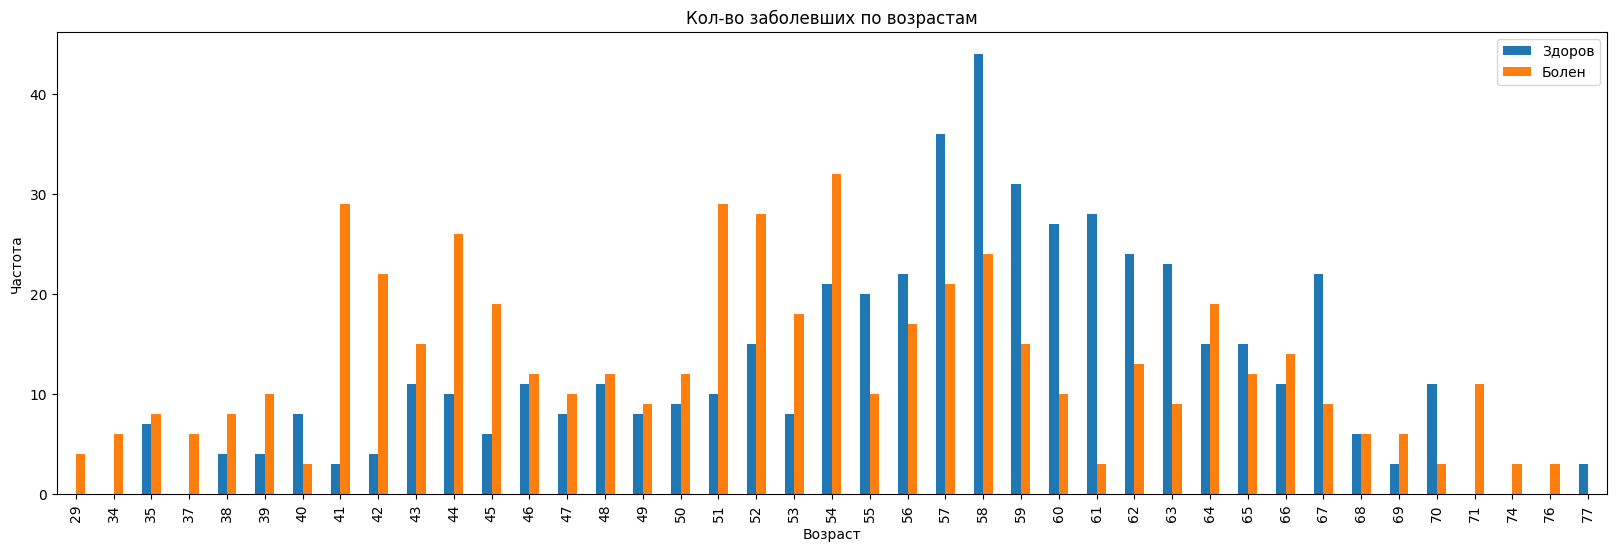

In [7]:
pd.crosstab(df["age"], df["target"]).plot(kind="bar",figsize=(20,6))
plt.title('Кол-во заболевших по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(["Здоров", "Болен"])
plt.show()


До 55 количество больных преобладает над здоровыми, после 55 - количество здоровых больше чем больных.

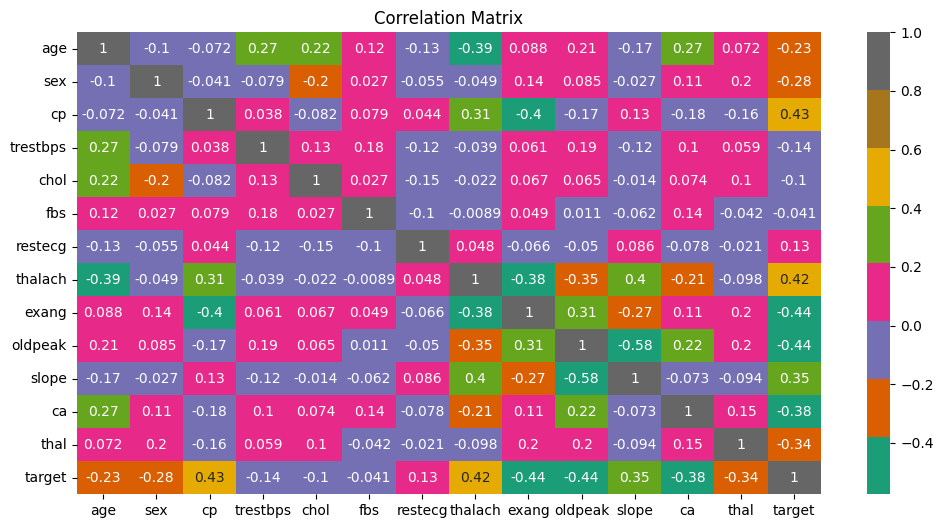

In [8]:
df_corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True, cmap="Dark2")
plt.title("Correlation Matrix")
plt.show()

Очевидных корреляций между признаками нет.

## Подготовка датасета

### Масштабирование признаков

In [9]:
from sklearn.preprocessing import StandardScaler

y = df['target']
x_full = df.drop(['target'], axis=1)

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_full), columns=x_full.columns)
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268,0.662,-0.916,-0.378,-0.659,-0.419,0.891,0.821,-0.712,-0.061,0.995,1.209,1.090
1,-0.158,0.662,-0.916,0.479,-0.834,2.387,-1.004,0.256,1.404,1.727,-2.244,-0.732,1.090
2,1.717,0.662,-0.916,0.765,-1.396,-0.419,0.891,-1.049,1.404,1.301,-2.244,-0.732,1.090
3,0.724,0.662,-0.916,0.936,-0.834,-0.419,0.891,0.517,-0.712,-0.912,0.995,0.239,1.090
4,0.834,-1.512,-0.916,0.365,0.931,2.387,0.891,-1.875,-0.712,0.705,-0.624,2.180,-0.522


### Выбор наилучшего подмножества признаков

In [10]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfecv = RFECV(estimator=LogisticRegression())
rfecv.fit(x, y)

best_cols = list(x.columns[rfecv.support_])
print("Достаточное число признаков:", rfecv.n_features_)
print("Самые важные признаки:", *best_cols)


Достаточное число признаков: 12
Самые важные признаки: age sex cp trestbps chol restecg thalach exang oldpeak slope ca thal


In [11]:
x = x[best_cols]
x.head()


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268,0.662,-0.916,-0.378,-0.659,0.891,0.821,-0.712,-0.061,0.995,1.209,1.090
1,-0.158,0.662,-0.916,0.479,-0.834,-1.004,0.256,1.404,1.727,-2.244,-0.732,1.090
2,1.717,0.662,-0.916,0.765,-1.396,0.891,-1.049,1.404,1.301,-2.244,-0.732,1.090
3,0.724,0.662,-0.916,0.936,-0.834,0.891,0.517,-0.712,-0.912,0.995,0.239,1.090
4,0.834,-1.512,-0.916,0.365,0.931,0.891,-1.875,-0.712,0.705,-0.624,2.180,-0.522


### Разбиение данных на тренировочные и тестовые

In [12]:
from sklearn.model_selection import train_test_split

x_np = x.to_numpy()
y_np = y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train_np, x_test_np, y_train_np, y_test_np = [
    np.array(t) for t in [x_train, x_test, y_train, y_test]
]


## Обучение моделей

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


models = {
    "My KNN": KNNClassifier,
    "My SVM": SVMClassifier,
    "KNN": KNeighborsClassifier,
    "SVC": SVC,
    "Logistic Regression": LogisticRegression,
    "GaussianNB": GaussianNB,
    "DecisionTreeClassifier": DecisionTreeClassifier,
}


In [14]:
grid = {
    "My KNN": {"k": [1, 3, 5, 7, 9, 11]},
    "My SVM": {
        "learning_rate": [0.01, 0.0001],
        "iter_num": [100, 500, 1000],
        "lmda": [0.01, 0.0001],
    },
    "Logistic Regression": {"C": np.arange(1e-05, 5, 0.1)},
    "SVC": {
        "C": [0.1, 0.5, 1, 2],
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "degree": [2, 3, 4, 5],
        "gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1],
        "coef0": [-1, -0.5, 0, 0.5, 1],
    },
    "KNN": {
        "n_neighbors": [1, 3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
    },
    "GaussianNB": {
        "priors": [None, [0.6, 0.4], [0.5, 0.5]],
        "var_smoothing": np.logspace(0, -9, num=100),
    },
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [2, 3, 4, 5, 10, 20],
        "min_samples_split": [2, 4, 5, 10],
        "min_samples_leaf": [1, 2, 4, 6],
        "max_features": [2, 4, 6, 8],
    },
}


In [15]:
from itertools import product
from sklearn.metrics import accuracy_score

best_params = dict()
for model_name in models:
    list_of_params = []
    for parameter in grid[model_name]:
        list_of_params.append(grid[model_name][parameter])
    cartesian_product = product(*list_of_params)

    best_params[model_name] = None
    best_acc = 0
    for elem in cartesian_product:
        params = dict()
        for i, parameter in enumerate(grid[model_name]):
            params[parameter] = elem[i]

        model = models[model_name](**params)
        model.fit(x_train_np.copy(), y_train_np.copy())
        acc = accuracy_score(model.predict(x_train_np.copy()), y_train_np)
        if acc > best_acc:
            best_params[model_name] = params
            best_acc = acc
    print(f"Параметры для {model_name}")
    print(f"Лучшая точность = {best_acc}")
    print(f"Лучшие параметры {best_params[model_name]}")
    print("****")


Параметры для My KNN
Лучшая точность = 1.0
Лучшие параметры {'k': 1}
****
Параметры для My SVM
Лучшая точность = 0.8567708333333334
Лучшие параметры {'learning_rate': 0.01, 'iter_num': 100, 'lmda': 0.0001}
****
Параметры для KNN
Лучшая точность = 1.0
Лучшие параметры {'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'ball_tree'}
****
Параметры для SVC
Лучшая точность = 1.0
Лучшие параметры {'C': 0.1, 'kernel': 'poly', 'degree': 3, 'gamma': 1, 'coef0': 0}
****
Параметры для Logistic Regression
Лучшая точность = 0.8489583333333334
Лучшие параметры {'C': 0.10001}
****
Параметры для GaussianNB
Лучшая точность = 0.8489583333333334
Лучшие параметры {'priors': [0.6, 0.4], 'var_smoothing': 0.0533669923120631}
****
Параметры для DecisionTreeClassifier
Лучшая точность = 1.0
Лучшие параметры {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 6}
****


### Обучение

In [16]:
accuracies = dict()
trained_models = dict()
for model_name in models:
    model = models[model_name](**best_params[model_name])
    model.fit(x_train_np.copy(), y_train_np.copy())
    acc = accuracy_score(model.predict(x_test_np.copy()), y_test_np)

    print(f"Точность {model_name} - {acc}")

    accuracies[model_name] = acc
    trained_models[model_name] = model


Точность My KNN - 1.0
Точность My SVM - 0.8599221789883269
Точность KNN - 1.0
Точность SVC - 1.0
Точность Logistic Regression - 0.8599221789883269
Точность GaussianNB - 0.8287937743190662
Точность DecisionTreeClassifier - 1.0


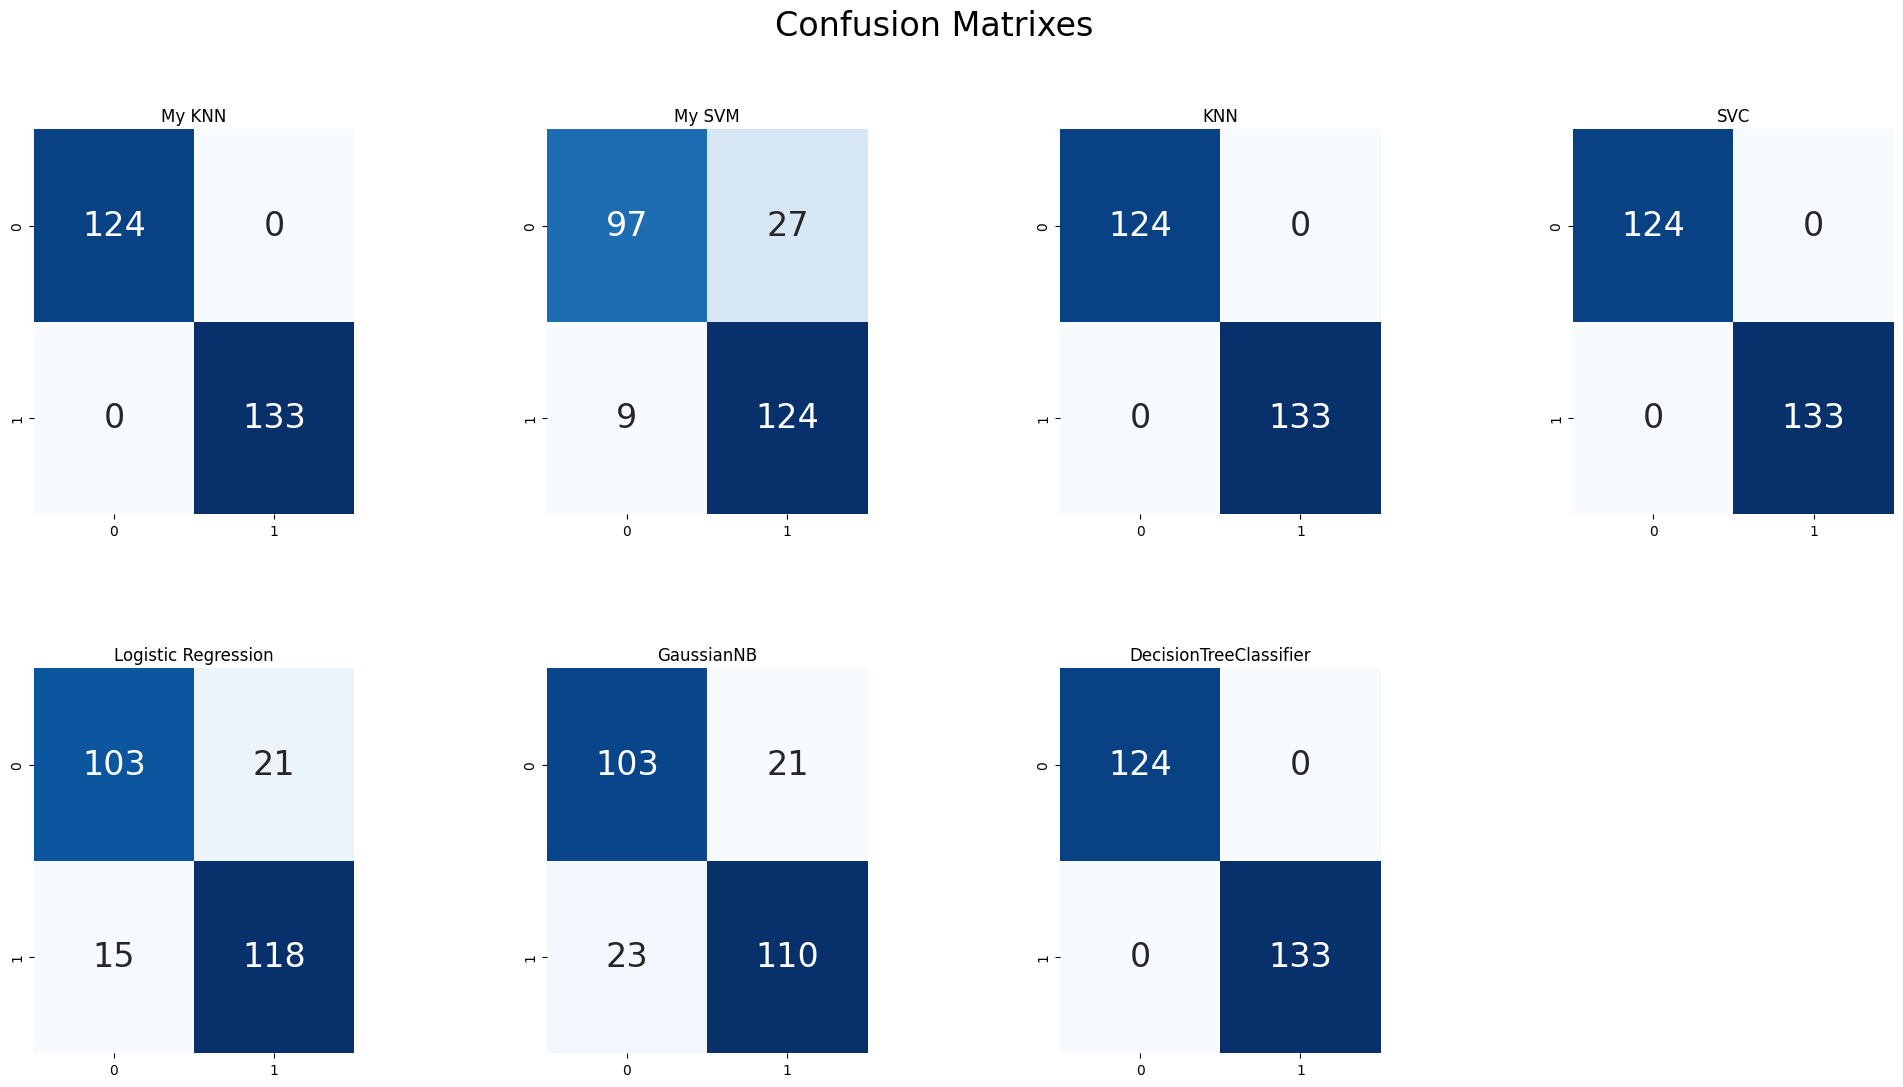

In [17]:
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(24, 12))
plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace=0.6, hspace=0.4)


for idx, model_name in enumerate(trained_models):
    cm = confusion_matrix(y_test_np, trained_models[model_name].predict(x_test_np))
    plt.subplot(2, 4, idx + 1)
    plt.title(model_name)
    sns.heatmap(
        cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
    )

plt.show()


## Выводы

- Лучшими кластеризаторами оказались Decision Tree, KNN
- Реализованный вручную KNN показал результаты схожие с библиотечным
- Собственная реализация SVM оказалась одним из худших рассмотренных кластеризаторов

## Другой датасет

Датасет: [tree-survival](https://www.kaggle.com/datasets/yekenot/tree-survival-prediction)

Признаки:
- No: уникальный идентификационный номер саженца
- Plot: номер участка, на котором был посажен саженец. (1-18)
- Subplot: подучасток внутри основного участка, на котором был посажен саженец. Разделен на 5 подучастков (4 угла, плюс 1 в середине) (А-Е)
- Species: виды, включают Acer saccharum, Prunus serotina, Quercus alba и Quercus redra
- Light ISF: уровень освещенности, определенный с помощью программного обеспечения HemiView. Представляет количество света, достигающего каждого участка на высоте 1м
- Light Cat: категориальный уровень освещенности, созданный путем разделения диапазона значений Light_ISF на три интервала (низкий, средний, высокий)
- Core: год, когда керн почвы был удален с поля
- Soil: виды, из которых был взят керн почвы. Включает все виды, а также Acer rubrum, Populus grandidentata и стерилизованных особей каждого вида
- Adult: отдельное дерево, с которого была взята почва. До 6 взрослых особей каждого вида. Используется как случайный эффект в анализе
- Sterile: была ли почва стерилизована или нет
- Conspecific: была ли почва конспецифической, гетероспецифичной или стерилизованной конспецифической
- Myco: микоризный тип сеянцев (AMF или EMF)
- SoilMyco: микоризный тип видов, возделывающих почву (AMF или EMF)
- PlantDate: дата посадки рассады в полевые горшки
- AMF: процент колонизации арбускулярных микоризных грибов на тонких корнях собранных сеянцев
- EMF: процент колонизации эктомикоризных грибов на кончиках корней собранных саженцев
- Phenolics: рассчитаны в нмоль эквивалентах галловой кислоты на мг сухого экстракта
- NSC: рассчитывается как процент неструктурных углеводов в сухой массе
- Lignin: рассчитывается как процент лигнина по сухой массе
- Census: номер переписи, когда саженец погиб или был собран
- Time:количество дней, в течение которых саженец погиб или был собран
- Event: используется для анализа выживаемости, чтобы указать состояние каждого отдельного саженца в данный момент времени (выше) (1 - мёртв, 0 - выжил до конца эксперимента)
- Harvest: указывает, был ли собран саженец для измерения признаков
- Alive: указывает, был ли саженец живым в конце второго вегетационного периода. «X» в этом поле указывает на активное состояние

Задача - определить, выживет ли образец `Event`.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.3f}".format

df = pd.read_csv("../../data/tree_data/Tree_Data.csv")
df.head()


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.000,NaN,-0.560,13.860,12.150,4,14.000,1.000,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.820,31.070,5.190,20.520,19.290,33,115.500,0.000,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.450,28.190,3.360,24.740,15.010,18,63.000,1.000,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.230,NaN,-0.710,14.290,12.360,4,14.000,1.000,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.150,NaN,-0.580,10.850,11.200,4,14.000,1.000,NaN,NaN


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [56]:
df.size

66792

Почистим датасет, удалим записи, в которых отсутствуют данные, а так же те, в которых образец был собран для измерения признаков.

In [57]:
df = df.drop(["No", "Harvest", "Alive"], axis=1)
df = df.dropna(axis=0, how="any")
df['Event'] = df['Event'].astype('int')
df.head()


,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,...,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
1,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,...,EMF,5/25/18,15.820,31.070,5.190,20.520,19.290,33,115.500,0
2,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,...,AMF,5/31/18,24.450,28.190,3.360,24.740,15.010,18,63.000,1
6,1,A,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,Heterospecific,...,EMF,5/25/18,24.000,20.000,5.110,18.820,22.510,7,24.500,0
7,1,A,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,Sterilized,...,Sterile,5/23/18,4.000,0.000,3.430,25.220,14.810,7,24.500,0
8,1,A,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,Heterospecific,...,AMF,5/29/18,28.740,36.180,3.830,26.650,14.650,33,115.500,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1282 entries, 1 to 2780
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Plot         1282 non-null   int64  
 1   Subplot      1282 non-null   object 
 2   Species      1282 non-null   object 
 3   Light_ISF    1282 non-null   float64
 4   Light_Cat    1282 non-null   object 
 5   Core         1282 non-null   int64  
 6   Soil         1282 non-null   object 
 7   Adult        1282 non-null   object 
 8   Sterile      1282 non-null   object 
 9   Conspecific  1282 non-null   object 
 10  Myco         1282 non-null   object 
 11  SoilMyco     1282 non-null   object 
 12  PlantDate    1282 non-null   object 
 13  AMF          1282 non-null   float64
 14  EMF          1282 non-null   float64
 15  Phenolics    1282 non-null   float64
 16  Lignin       1282 non-null   float64
 17  NSC          1282 non-null   float64
 18  Census       1282 non-null   int64  
 19  Time       

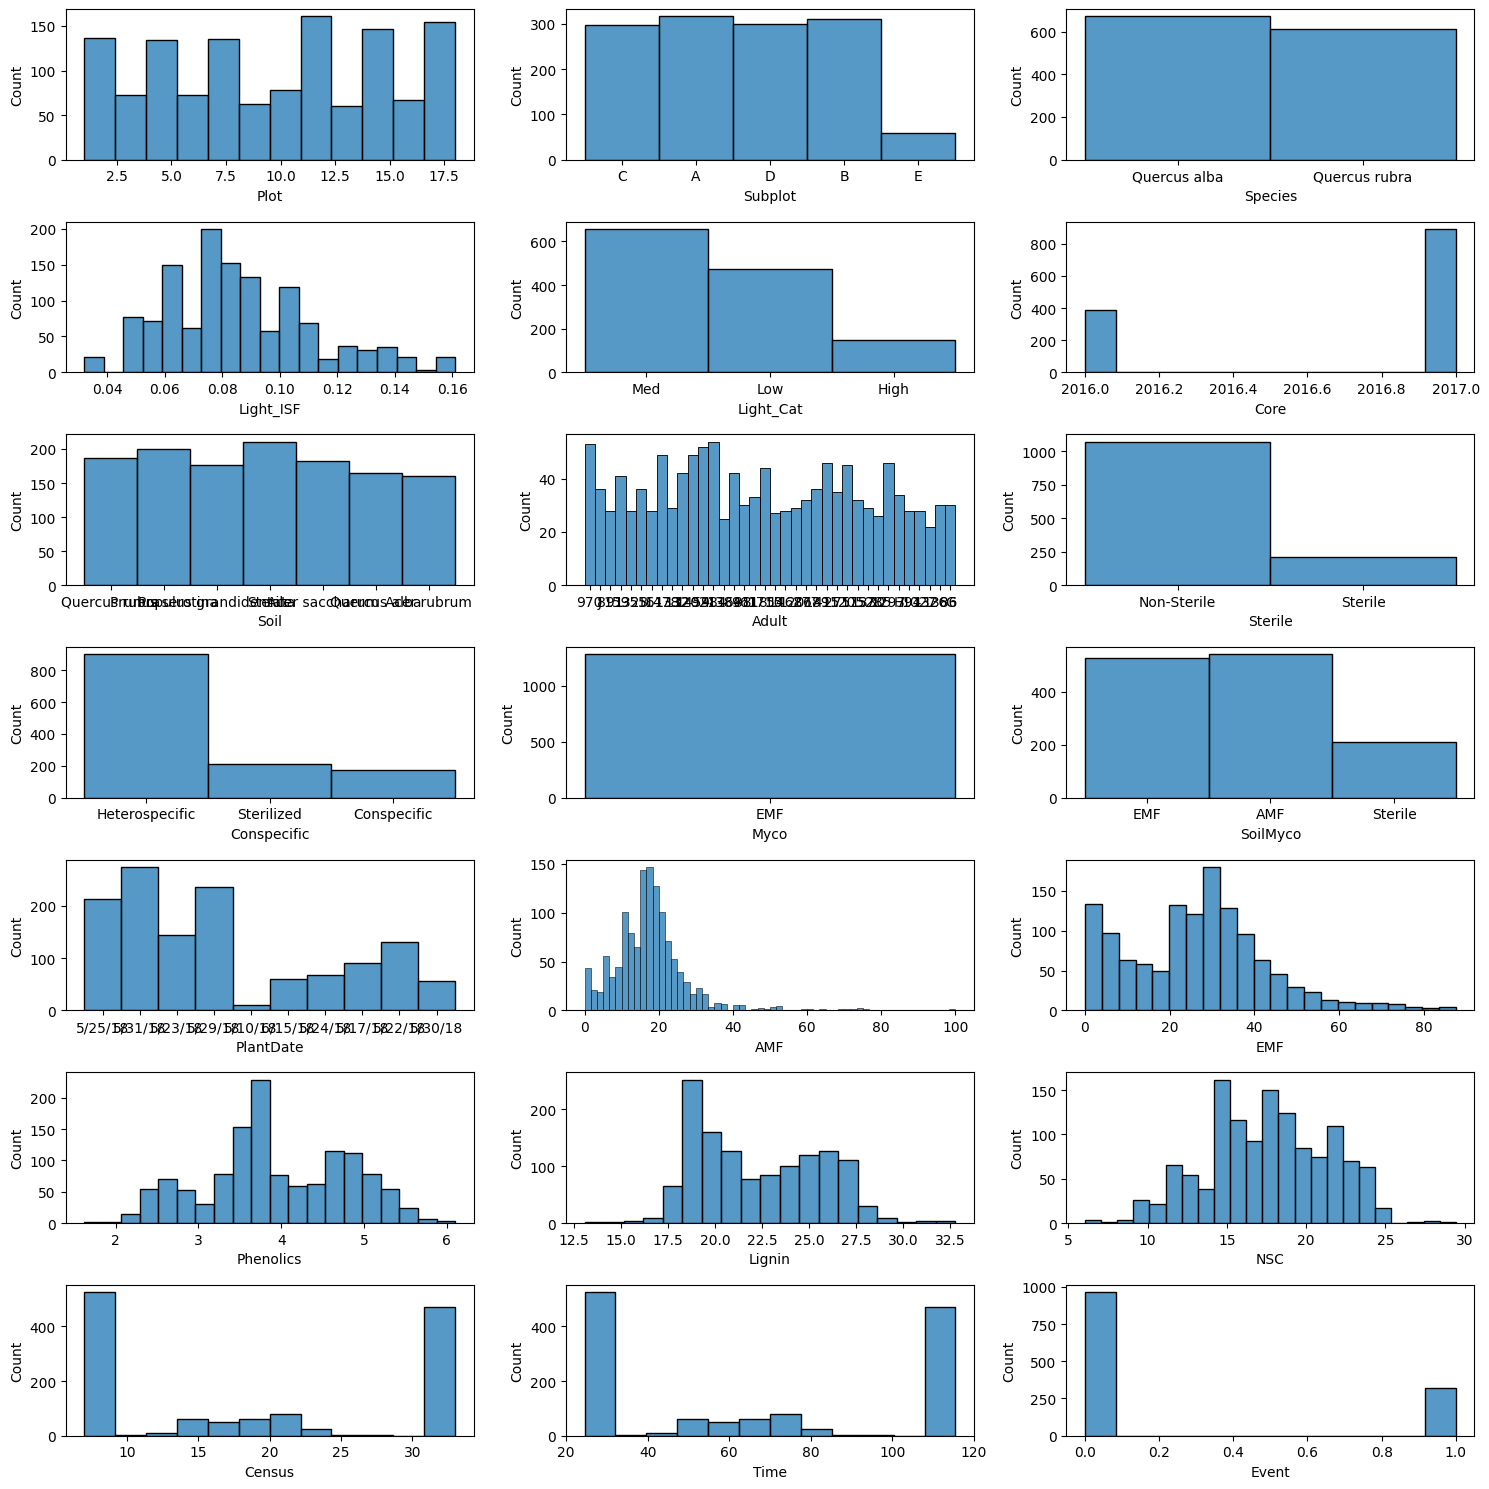

In [59]:
list(df.columns)

fig = plt.figure(figsize=(15, 15), tight_layout=True)
gs = fig.add_gridspec(7, 3)
for i in range(7):
    for j in range(3):
        sns.histplot(df[df.columns[3 * i + j]], ax=fig.add_subplot(gs[i, j]))

Признак `Myco` выродился, удалим эту колонку.

In [60]:
df = df.drop(["Myco"], axis=1)
df.head()

,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
1,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,5/25/18,15.820,31.070,5.190,20.520,19.290,33,115.500,0
2,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,5/31/18,24.450,28.190,3.360,24.740,15.010,18,63.000,1
6,1,A,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,Heterospecific,EMF,5/25/18,24.000,20.000,5.110,18.820,22.510,7,24.500,0
7,1,A,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,Sterilized,Sterile,5/23/18,4.000,0.000,3.430,25.220,14.810,7,24.500,0
8,1,A,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,Heterospecific,AMF,5/29/18,28.740,36.180,3.830,26.650,14.650,33,115.500,0


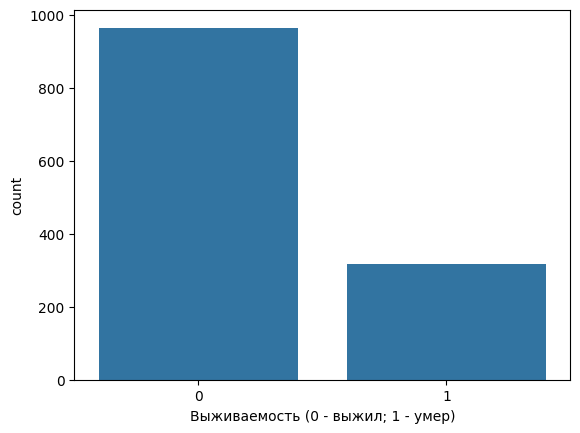

In [61]:
sns.countplot(x="Event", data=df)
plt.xlabel('Выживаемость (0 - выжил; 1 - умер)')
plt.show()

Приведём не числовые аттрибуты к числовым.

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
1,1,2,0,0.106,2,2017,5,30,0,1,1,5,15.820,31.070,5.190,20.520,19.290,33,115.500,0
2,1,2,1,0.106,2,2017,3,35,0,1,0,8,24.450,28.190,3.360,24.740,15.010,18,63.000,1
6,1,0,0,0.108,2,2016,2,27,0,1,1,5,24.000,20.000,5.110,18.820,22.510,7,24.500,0
7,1,0,1,0.108,2,2017,6,15,1,2,2,3,4.000,0.000,3.430,25.220,14.810,7,24.500,0
8,1,0,1,0.108,2,2016,1,6,0,1,0,6,28.740,36.180,3.830,26.650,14.650,33,115.500,0


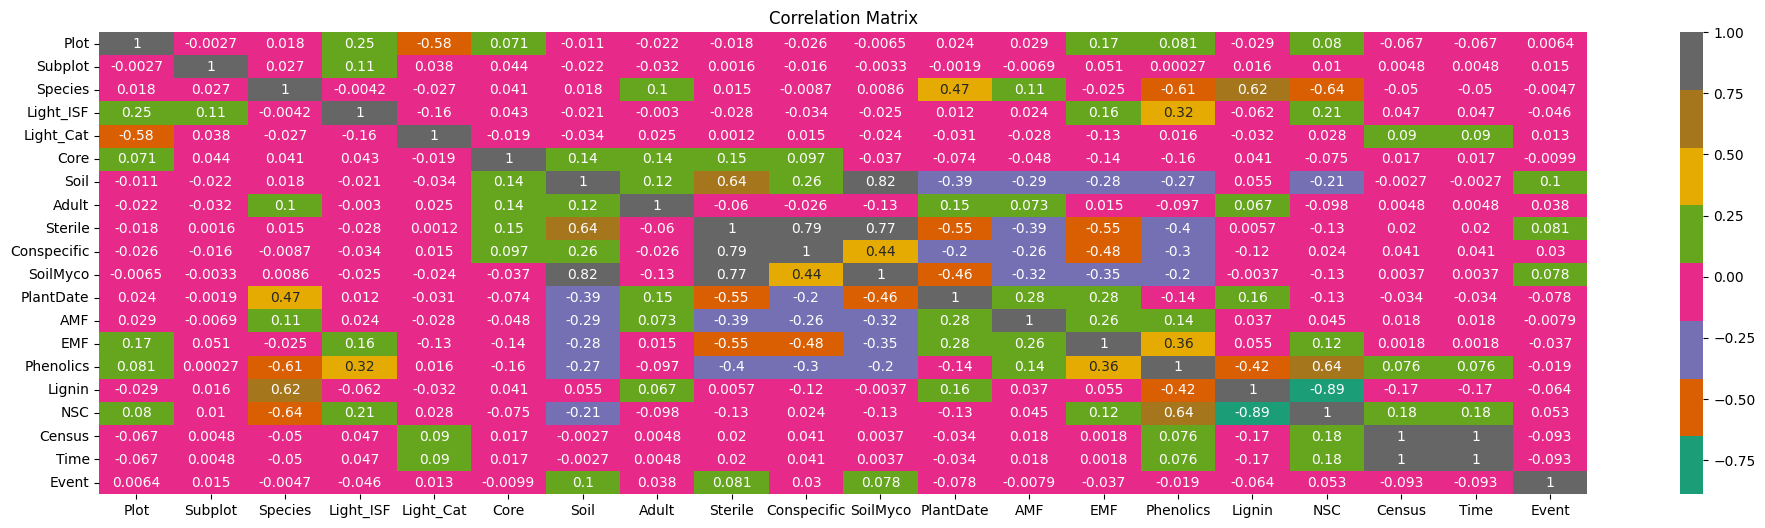

In [63]:
df_corr = df.corr()
plt.figure(figsize=(24, 6))
sns.heatmap(df_corr, annot=True, cmap="Dark2")
plt.title("Correlation Matrix")
plt.show()

Очевидных корреляций нет.

## Подготовка датасета

### Масштабирование признаков

In [64]:
from sklearn.preprocessing import StandardScaler

y = df['Event']
x_full = df.drop(['Event'], axis=1)

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_full), columns=x_full.columns)
x.head()

,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time
0,-1.658,0.339,-0.953,0.777,0.878,0.660,0.940,1.160,-0.444,-0.057,0.359,-0.079,-0.164,0.276,1.465,-0.529,0.452,1.210,1.210
1,-1.658,0.339,1.050,0.777,0.878,0.660,-0.058,1.641,-0.444,-0.057,-1.027,1.172,0.724,0.103,-0.679,0.765,-0.674,-0.092,-0.092
2,-1.658,-1.307,-0.953,0.853,0.878,-1.515,-0.557,0.872,-0.444,-0.057,0.359,-0.079,0.678,-0.389,1.371,-1.051,1.300,-1.047,-1.047
3,-1.658,-1.307,1.050,0.853,0.878,0.660,1.439,-0.282,2.253,1.778,1.744,-0.913,-1.381,-1.592,-0.597,0.912,-0.727,-1.047,-1.047
4,-1.658,-1.307,1.050,0.853,0.878,-1.515,-1.056,-1.147,-0.444,-0.057,-1.027,0.338,1.166,0.583,-0.128,1.351,-0.769,1.210,1.210


### Выбор наилучшего подмножества признаков

In [65]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfecv = RFECV(estimator=LogisticRegression())
rfecv.fit(x, y)

best_cols = list(x.columns[rfecv.support_])
print("Достаточное число признаков:", rfecv.n_features_)
print("Самые важные признаки:", *best_cols)

Достаточное число признаков: 1
Самые важные признаки: Soil


In [66]:
rank_list = list(zip(rfecv.ranking_, x.columns.values))
rank_list.sort()
rank_list

[(1, 'Soil'),
 (2, 'Time'),
 (3, 'NSC'),
 (4, 'Species'),
 (5, 'PlantDate'),
 (6, 'SoilMyco'),
 (7, 'Light_ISF'),
 (8, 'Census'),
 (9, 'Sterile'),
 (10, 'Conspecific'),
 (11, 'Core'),
 (12, 'Adult'),
 (13, 'Subplot'),
 (14, 'AMF'),
 (15, 'Phenolics'),
 (16, 'Lignin'),
 (17, 'Light_Cat'),
 (18, 'Plot'),
 (19, 'EMF')]

Возьмём 4 лучших признаков - `Soil`, `Time`, `NSC`, `Species`

In [67]:
x = x[[r[1] for r in rank_list[:4]]]
x.head()

,Soil,Time,NSC,Species
0,0.940,1.210,0.452,-0.953
1,-0.058,-0.092,-0.674,1.050
2,-0.557,-1.047,1.300,-0.953
3,1.439,-1.047,-0.727,1.050
4,-1.056,1.210,-0.769,1.050


### Разбиение данных на тренировочные и тестовые

In [68]:
from sklearn.model_selection import train_test_split

x_np = x.to_numpy()
y_np = y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train_np, x_test_np, y_train_np, y_test_np = [
    np.array(t) for t in [x_train, x_test, y_train, y_test]
]

## Обучение моделей

In [69]:
from itertools import product
from sklearn.metrics import accuracy_score

best_params = dict()
for model_name in models:
    list_of_params = []
    for parameter in grid[model_name]:
        list_of_params.append(grid[model_name][parameter])
    cartesian_product = product(*list_of_params)

    best_params[model_name] = None
    best_acc = 0
    for elem in cartesian_product:
        params = dict()
        for i, parameter in enumerate(grid[model_name]):
            params[parameter] = elem[i]

        model = models[model_name](**params)
        model.fit(x_train_np.copy(), y_train_np.copy())
        acc = accuracy_score(model.predict(x_train_np.copy()), y_train_np)
        if acc > best_acc:
            best_params[model_name] = params
            best_acc = acc
    print(f"Параметры для {model_name}")
    print(f"Лучшая точность = {best_acc}")
    print(f"Лучшие параметры {best_params[model_name]}")
    print("****")


Параметры для My KNN
Лучшая точность = 1.0
Лучшие параметры {'k': 1}
****
Параметры для My SVM
Лучшая точность = 0.7502601456815817
Лучшие параметры {'learning_rate': 0.01, 'iter_num': 100, 'lmda': 0.01}
****
Параметры для KNN
Лучшая точность = 1.0
Лучшие параметры {'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'ball_tree'}
****
Параметры для SVC
Лучшая точность = 0.9843912591050988
Лучшие параметры {'C': 0.1, 'kernel': 'poly', 'degree': 4, 'gamma': 1, 'coef0': 1}
****
Параметры для Logistic Regression
Лучшая точность = 0.7502601456815817
Лучшие параметры {'C': 1e-05}
****
Параметры для GaussianNB
Лучшая точность = 0.9802289281997919
Лучшие параметры {'priors': [0.5, 0.5], 'var_smoothing': 0.0657933224657568}
****
Параметры для DecisionTreeClassifier
Лучшая точность = 1.0
Лучшие параметры {'criterion': 'gini', 'splitter': 'best', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 2}
****


### Обучение

In [70]:
accuracies = dict()
trained_models = dict()
for model_name in models:
    model = models[model_name](**best_params[model_name])
    model.fit(x_train_np.copy(), y_train_np.copy())
    acc = accuracy_score(model.predict(x_test_np.copy()), y_test_np)

    print(f"Точность {model_name} - {acc}")

    accuracies[model_name] = acc
    trained_models[model_name] = model


Точность My KNN - 0.9626168224299065
Точность My SVM - 0.7570093457943925
Точность KNN - 0.9626168224299065
Точность SVC - 0.9813084112149533
Точность Logistic Regression - 0.7570093457943925
Точность GaussianNB - 0.9719626168224299
Точность DecisionTreeClassifier - 0.9813084112149533


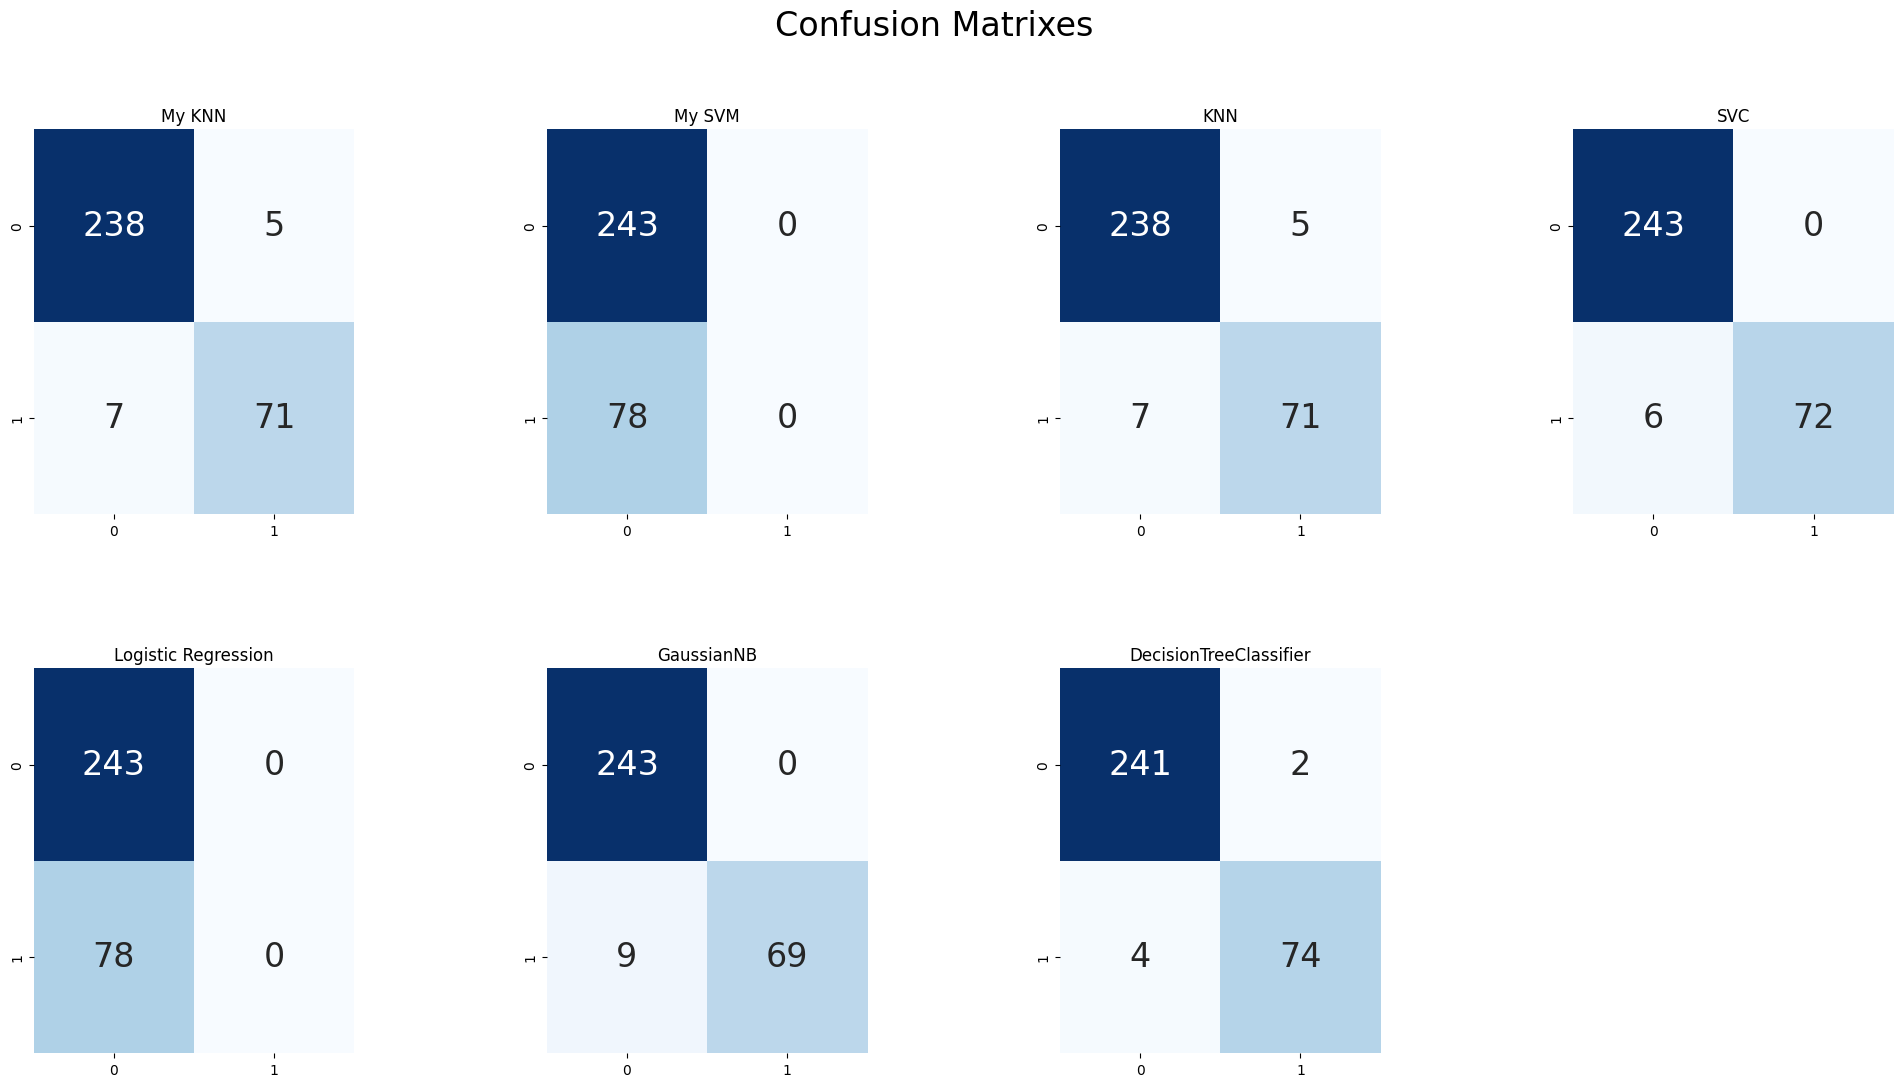

In [71]:
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(24, 12))
plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace=0.6, hspace=0.4)


for idx, model_name in enumerate(trained_models):
    cm = confusion_matrix(y_test_np, trained_models[model_name].predict(x_test_np))
    plt.subplot(2, 4, idx + 1)
    plt.title(model_name)
    sns.heatmap(
        cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
    )

plt.show()


### Выводы

- Модели SVM, Logistic Regression всегда давали положительный результат
- Остальные модели показали хорошие результаты